In [ ]:
!pip install Streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 8.7 MB/s 
     |████████████████████████████████| 237 kB 46.9 MB/s 
     |████████████████████████████████| 182 kB 28.8 MB/s 
     |████████████████████████████████| 164 kB 6.1 MB/s 
     |████████████████████████████████| 78 kB 842 kB/s 
     |████████████████████████████████| 4.7 MB 7.0 MB/s 
     |████████████████████████████████| 62 kB 210 kB/s 
     |████████████████████████████████| 51 kB 2.7 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=5574335c625df7ff2454767a411ae0c185cdc3d3d0279f7694cafc3ab5836cb6
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import streamlit as st
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
df_list = []
start='2012-08-01'
end='2021-12-31'
company = ['TSLA','FORD','RACE','BMWYY','MBGAF','AAPL','GOOG','META','AMZN','AAL']
for company_name in company:
    df = yf.download(company_name, start,end)
    df['company'] = company_name
    #df['company_encode'] = company_name
    df_list.append(df)
data = pd.concat(df_list)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2012-08-01,1.866000,1.866000,1.735333,1.750000,1.750000,23884500,TSLA
2012-08-02,1.789333,1.790000,1.701333,1.740000,1.740000,19576500,TSLA
2012-08-03,1.793333,1.836667,1.782667,1.818000,1.818000,18142500,TSLA
2012-08-06,1.836667,1.913333,1.836667,1.884667,1.884667,22923000,TSLA
2012-08-07,1.918000,2.060000,1.900000,2.016667,2.016667,35808000,TSLA
...,...,...,...,...,...,...,...
2021-12-23,18.590000,18.719999,18.150000,18.260000,18.260000,32321000,AAL
2021-12-27,17.660000,18.240000,17.549999,18.170000,18.170000,28059300,AAL
2021-12-28,18.030001,18.639999,17.920000,18.540001,18.540001,28263600,AAL


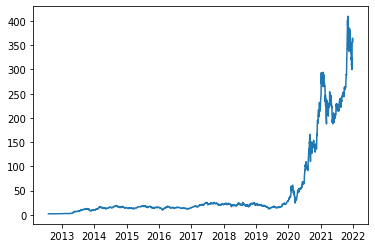

In [ ]:
# plot of closing price

plt.plot(data[data['company']=='TSLA'].Close)

In [ ]:
# 100 day moving average

ma100 = data[data['company']=='TSLA'].Close.rolling(100).mean()
ma100

Date
2012-08-01           NaN
2012-08-02           NaN
2012-08-03           NaN
2012-08-06           NaN
2012-08-07           NaN
                 ...    
2021-12-23    296.426800
2021-12-27    297.703534
2021-12-28    298.949667
2021-12-29    300.239967
2021-12-30    301.428567
Name: Close, Length: 2370, dtype: float64

In [ ]:
# 200 day moving average
ma200 = data[data['company']=='TSLA'].Close.rolling(200).mean()
ma200

Date
2012-08-01           NaN
2012-08-02           NaN
2012-08-03           NaN
2012-08-06           NaN
2012-08-07           NaN
                 ...    
2021-12-23    257.405517
2021-12-27    258.072534
2021-12-28    258.706750
2021-12-29    259.388934
2021-12-30    260.003150
Name: Close, Length: 2370, dtype: float64

In [ ]:
# 50 day moving average
ma50 = data[data['company']=='TSLA'].Close.rolling(50).mean()
ma50

Date
2012-08-01           NaN
2012-08-02           NaN
2012-08-03           NaN
2012-08-06           NaN
2012-08-07           NaN
                 ...    
2021-12-23    345.941133
2021-12-27    347.778599
2021-12-28    349.414866
2021-12-29    350.855399
2021-12-30    352.229199
Name: Close, Length: 2370, dtype: float64

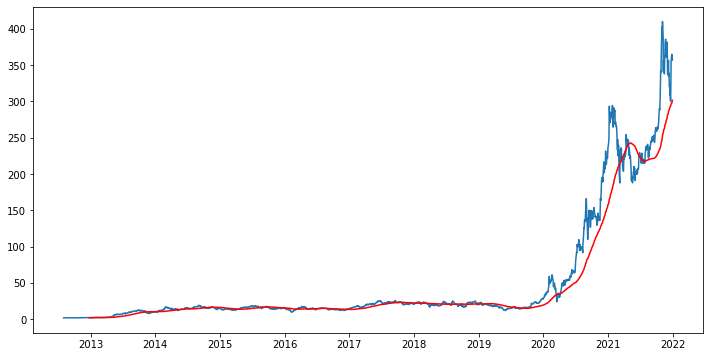

In [ ]:
# plot of 100 day moving average
plt.figure(figsize=(12,6))
plt.plot(data[data['company']=='TSLA'].Close)
plt.plot(ma100, 'r')

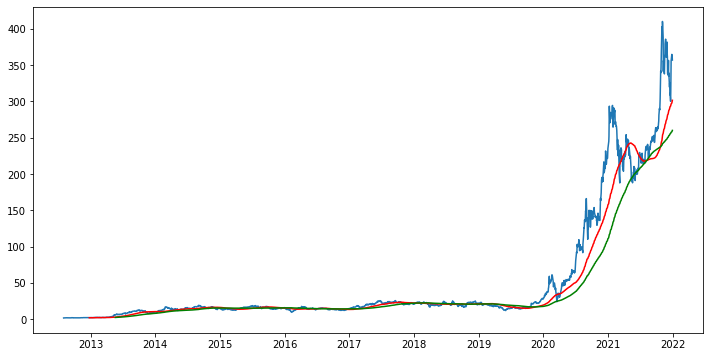

In [ ]:
# plot of 100 & 200 day moving average

plt.figure(figsize=(12,6))
plt.plot(data[data['company']=='TSLA'].Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

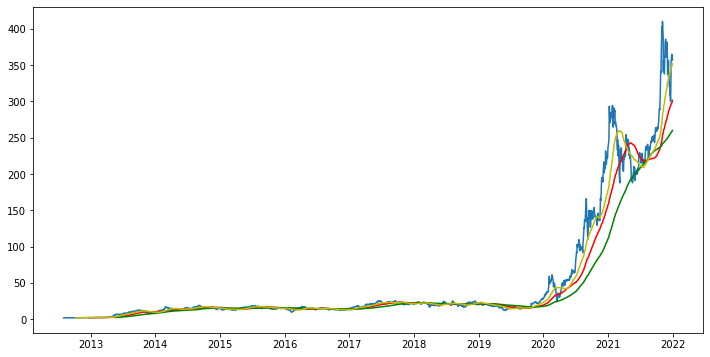

In [ ]:
# plot of 50, 100 & 200 day moving average
plt.figure(figsize=(12,6))
plt.plot(data[data['company']=='TSLA'].Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.plot(ma50, 'y')

In [ ]:
# prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data

array([[0.00278483],
       [0.00276041],
       [0.00295095],
       ...,
       [0.04380008],
       [0.04260309],
       [0.04265194]])

In [ ]:
# Training the data
prediction_days = 60

x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

# build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=50))
model.add(Dropout(0.2))


# prediction of the next closing value
model.add(Dense(units=1))

# model summary
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
# saving the model
#from keras.models import load_model
#model.save(' /Users/swathysubramanian/Downloads/my_model.h5') 
#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
    
    # returns a compiled model
    # identical to the previous one
#model = load_model('my_model.h5')



In [ ]:
model.save("/Users/swathysubramanian/Downloads/my_model.h5")

In [ ]:
# Save the entire model as a SavedModel.
#!mkdir -p saved_model
#model.save('saved_model/keras_model.h5')

In [ ]:
#model.save('keras_model.h5')

In [ ]:
# load test data

test_start ='2022-01-01' 
test_end = dt.datetime.now()
test_data= yf.download('TSLA',start=test_start, end=test_end)
#test_data = web.DataReader('TSLA', data_source='yahoo',start=test_start, end=test_end)
actual_prices = test_data['Close'].values
actual_prices

[*********************100%***********************]  1 of 1 completed


array([399.92666626, 383.19665527, 362.70666504, 354.8999939 ,
       342.32000732, 352.70666504, 354.79998779, 368.73999023,
       343.85333252, 349.86999512, 343.50332642, 331.8833313 ,
       332.08999634, 314.6333313 , 310.        , 306.1333313 ,
       312.47000122, 276.3666687 , 282.1166687 , 312.23999023,
       310.41665649, 301.88665771, 297.04666138, 307.77334595,
       302.44665527, 307.33334351, 310.66665649, 301.5166626 ,
       286.66665649, 291.92001343, 307.47665405, 307.79666138,
       292.1166687 , 285.66000366, 273.84332275, 254.67999268,
       266.92333984, 269.95666504, 290.14334106, 288.12332153,
       293.29666138, 279.76333618, 279.42999268, 268.19332886,
       274.79998779, 286.32333374, 279.43331909, 265.1166687 ,
       255.45666504, 267.29666138, 280.07666016, 290.5333252 ,
       301.79666138, 307.05334473, 331.32666016, 333.03668213,
       337.97332764, 336.88000488, 363.94665527, 366.52334595,
       364.66333008, 359.20001221, 361.52999878, 381.81

In [ ]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
# make prediction on test data
x_test = []

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 2s 20ms/step


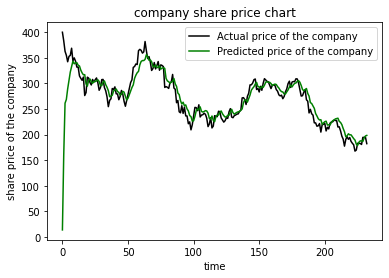

In [ ]:
# plot the test predictions
plt.plot(actual_prices, color='black',label='Actual price of the company')
plt.plot(predicted_prices, color='green',label='Predicted price of the company')
plt.title('company share price chart')
plt.xlabel('time')
plt.ylabel('share price of the company')
plt.legend()
plt.show()

In [ ]:
# predict next day price

real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[192.5166]]
